In [1]:
method = 'recon'
metric = 'anomaly_score'
update = 'false'

In [2]:
# Imports
import numpy as np
import seaborn as sns
from skmultiflow.drift_detection.adwin import ADWIN
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm 
import imageio.v2 as imageio
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.cm as cm
import matplotlib.animation as animation
import cv2
from time import sleep
import gc
import glob
from plotoptix import TkOptiX
import joblib
from joblib import Parallel, delayed
import warnings 
warnings.filterwarnings("ignore")
import os
from random import sample, seed, randint, random, shuffle, choice, choices, uniform, gauss, triangular
from PIL import Image, ImageOps 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/smoothjazzuser/miniconda3/lib/python3.9/site-packages/clr_loader/mono.py:165: UserWarning: Hosting Mono versions before v6.12 is known to be problematic. If the process crashes shortly after you see this message, try updating Mono to at least v6.12.
  warnings.warn(


	[0]: NVIDIA Graphics Device


In [3]:
a = sorted(glob.glob(f"/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/*.jpg"), key=lambda x: int(x.split('/')[-1].split('.')[0]))
a

['/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/000.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/001.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/002.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/003.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/004.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/005.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/006.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/007.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/008.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/009.png',
 '/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/54/010.png',
 '/home/smoothjazzuser/videogame-anomoly/MN

In [4]:

#adwin = ADWIN()
# Simulating a data stream as a normal distribution of 1's and 0's
#data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000

#load numpy files from /home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/{anomaly_score_total_list.npy, auc.npy, feature_distance_list.npy, psnr_list.npy, labels_list.npy} into variable to analyze

anomaly_score_total_list = np.load(f"/home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/anomaly_score_total_list.npy", allow_pickle=True)
auc = np.load(f"/home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/auc.npy", allow_pickle=True)
feature_distance_list = np.load(f"/home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/feature_distance_list.npy", allow_pickle=True)
psnr_list = np.load(f"/home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/psnr_list.npy", allow_pickle=True)
label_list = np.load(f"/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/frame_labels_bugs.npy", allow_pickle=True).tolist()[0]

# normalize python list values to 0-1 range
def normalize_list(list:list):
    min_val = min(list)
    max_val = max(list)
    return [(x-min_val)/(max_val-min_val) for x in list]

def normalize_array(array:np.ndarray):
    min_val = np.min(array)
    max_val = np.max(array)
    return (array-min_val)/(max_val-min_val)

def split_list(list:list, n:int):
    return [list[i:i+n] for i in range(0, len(list), n)]

In [5]:
x = anomaly_score_total_list
print(len(x))
print(len(label_list))
print(auc)
print(feature_distance_list.shape)

4960
4960
0.33309511289909743
()


In [6]:
key = list(np.array(psnr_list).reshape(1).tolist()[0].keys())[0]
key

'54'

In [7]:
name = key#'95'
psnr = normalize_list(np.array(psnr_list).reshape(1).tolist()[0][name])
feature_distance = normalize_list(feature_distance_list.tolist()[name])
#psnr = normalize_list(psnr)

#x = normalize_array(x)

adjustment = 4 if method == 'pred' else 0
x = x[adjustment:]
label_list = label_list[adjustment:]
psnr = psnr[adjustment:]
feature_distance = feature_distance[adjustment:]


x_shape = x.shape[0]
start = 0
end = int(x_shape)

if metric == 'anomaly_score':
    x = x[start:end]
elif metric == 'feature_distance':
    x = feature_distance[start:end]
elif metric == 'psnr':
    x = psnr[start:end]


In [8]:
len(feature_distance)

4960

In [9]:
label_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:

label_list = label_list[start:end]

In [11]:
label_points = {'x':[], 'y':[]}
label_plot = {'x':[], 'y':[]}
for i in range(len(label_list)):
    if label_list[i] == 1:
        label_points['x'].append(i)
        label_points['y'].append(x[i])
        
        label_plot['y'].append(x[i])
    else:
        label_plot['y'].append(0)
    label_plot['x'].append(i)

In [12]:
# use adwin for change detection of the timeseries represented by x
adwin = ADWIN(.05)
drift = {'x': [], 'y': []}
xpos = 0
for i in range(x_shape):  # number of frames in vide0
    g = adwin.add_element(x[i])
    if adwin.detected_change():
        drift['y'].append(x[i])
        drift['x'].append(xpos)
        adwin.reset()
    elif adwin.detected_warning_zone():
        drift['y'].append(x[i])
        drift['x'].append(xpos)

    xpos += 1
    

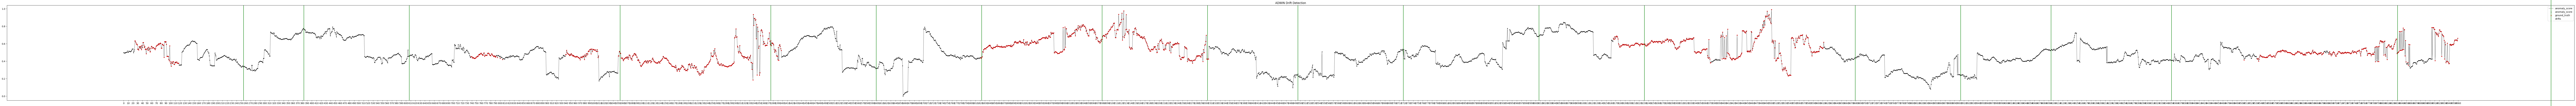

In [13]:

# plot the changes
fig, ax = plt.subplots()
fig.set_size_inches(200.5, 7.5, forward=True)
plt.xticks(np.arange(0, end+1, 10.0))

ax.plot(np.arange(len(x)), x, color='black', label='anomaly score', linewidth=0.6)
ax.scatter(np.arange(len(x)), x, color='black', label='anomaly score', s=4)
ax.scatter(label_points['x'], label_points['y'], color='red', marker='x', s=10)
ax.scatter(drift['x'], drift['y'],color='green', marker='|', s=1000000)


ax.legend([metric,metric,'ground_truth','drifts'])
ax.set_title('ADWIN Drift Detection')
plt.savefig(f"/home/smoothjazzuser/Desktop/{method}_{metric}_folder-{name}_updated-{update}.svg")
plt.show()



In [14]:
r = int((len(label_list)-1)/1)
preds = []
#load images from  /home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/preds/*jpg into variable to analyze
for i in range(r):
    preds.append(plt.imread(f"/home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/preds/{i}.jpg"))

diffs = []
for i in range(r):
    diffs.append(plt.imread(f"/home/smoothjazzuser/Desktop/videogame-anomoly/MNAD/exp/bugs/{method}/log/diffs/{i}.jpg"))

ground_truth = []
for i in range(r):
    if len(str(i)) == 1:
        ii = f"00{i}"
    elif len(str(i)) == 2:
        ii = f"0{i}"
    else:
        ii = f"{i}" 
    ground_truth.append(plt.imread(f"/home/smoothjazzuser/videogame-anomoly/MNAD/dataset/bugs/testing/frames/{name}/{ii}.jpg"))


In [15]:
!rm -rf /tmp/*.jpg
!rm -rf /tmp/*.jpg
!rm -rf /tmp/*.svg

In [16]:

def plot_images(i):
    window = 50
    if i > 50:
        window = i - 50
    else:
        window = 0
    
    #plot preds
    fig = plt.figure()
    fig.set_size_inches(10, 10, forward=True)
    ax = fig.add_subplot(2,2,1)
    ax.set_title(f"prediction {window}:{i}")
    ax.imshow(preds[i], cmap='gray') 

    #plot diffs
    ax = fig.add_subplot(2,2,2)
    ax.set_title(f"diff {window}:{i}")
    ax.imshow(diffs[i], cmap='gray')

    #plot ground_truth
    ax = fig.add_subplot(2,2,4)
    ax.set_title(f"ground truth {window}:{i}")
    ax.imshow(ground_truth[i], cmap='gray')

    #plot anomaly score
    ax = fig.add_subplot(2,2,3)
    ax.set_title(f"anomaly score {window}:{i}")
    ax.plot(np.arange(len(x[window:i])), x[window:i], color='black', label='anomaly score', linewidth=0.6)
    ax.scatter(np.arange(len(x[window:i])), x[window:i], color='black', label='anomaly score', s=4)
    ax.scatter(np.arange(len(label_plot['x'][window:i])), label_plot['y'][window:i], color='red', marker='x', s=4)
    ax.legend([metric])
    ax.set_title('ADWIN Drift Detection')
    fig.tight_layout()
    fig.subplots_adjust(wspace=0, hspace=0)
    #set ax to show 50 x values
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 1)
    fig.savefig(f"/tmp/{i}.jpg", bbox_inches='tight', pad_inches=0)
    
    fig.clear()
    plt.close(fig)
    del ax
    del window
    del fig
    return None

#split r into 10 chunks
rr = list(range(r))

a = Parallel(n_jobs=12, backend='multiprocessing')(delayed(plot_images)(i) for i in rr[0:int(len(rr)/2)]) #multiprocessing'  'loky', require='sharedmem'
del a
gc.collect()
a = Parallel(n_jobs=12, backend='multiprocessing')(delayed(plot_images)(i) for i in rr[int(len(rr)/2):-1]) #multiprocessing'  'loky', require='sharedmem'
del a
gc.collect()
# for i in range(r):
#     plot_images(i)
#     gc.collect()


# for i in tqdm(range(r)):
#     plot_images(i)


del preds
del diffs
del ground_truth
gc.collect()


0

In [17]:
frames = [] # for storing the generated images
a = imageio.imread(f"/tmp/0.jpg").shape
h,w = a[0], a[1]
for i in tqdm(range(r-1)):
    frames.append(np.uint8(cv2.resize(imageio.imread(f"/tmp/{i}.jpg"), (1008,1008))))

100%|██████████| 4958/4958 [00:17<00:00, 289.64it/s]


In [18]:
!rm -rf /tmp/*.jpg
!rm -rf /tmp/*.jpg
!rm -rf /tmp/*.svg
#delete all variables except frames
gc.collect()

0

In [19]:
# save frames as an mp4
#resize all images in frames to the same size (the largest common size)
#get max size of image in frames

#h = max([frame.shape[0] for frame in frames])
#w = max([frame.shape[1] for frame in frames])
#frames = [cv2.resize(frame, (w,h)) for frame in frames]
imageio.mimsave(f'/home/smoothjazzuser/Desktop/{method}_{metric}_folder-{name}_updated-{update}.mp4', frames, fps=10)

In [20]:
#free all variables
del frames
gc.collect()

0